In [1]:
#install.packages('randomForest')
library(readxl)
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('dplyr')
library(dplyr)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)


Warning message:
"package 'randomForest' was built under R version 4.0.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'tibble' was built under R version 4.0.3"
Warning message:
"package 'dplyr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine()  masks randomForest::combine()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks s

# FA (weighted) Classifcation

In [7]:
df.wa = read_excel( "../../results/df-water-access.xlsx" ,sheet=1)
df.explore =read_excel( '../../results/df-exp.xlsx' ,sheet=1)
df.cluster = read_excel("../../results/df-fa-cluster-rank.xlsx" ,sheet=1)
df.wb = read_excel("../../results/df-wb.xlsx" ,sheet=1 )
df.explore$clusters <- as.numeric(df.cluster$clusters)
df <- df.explore

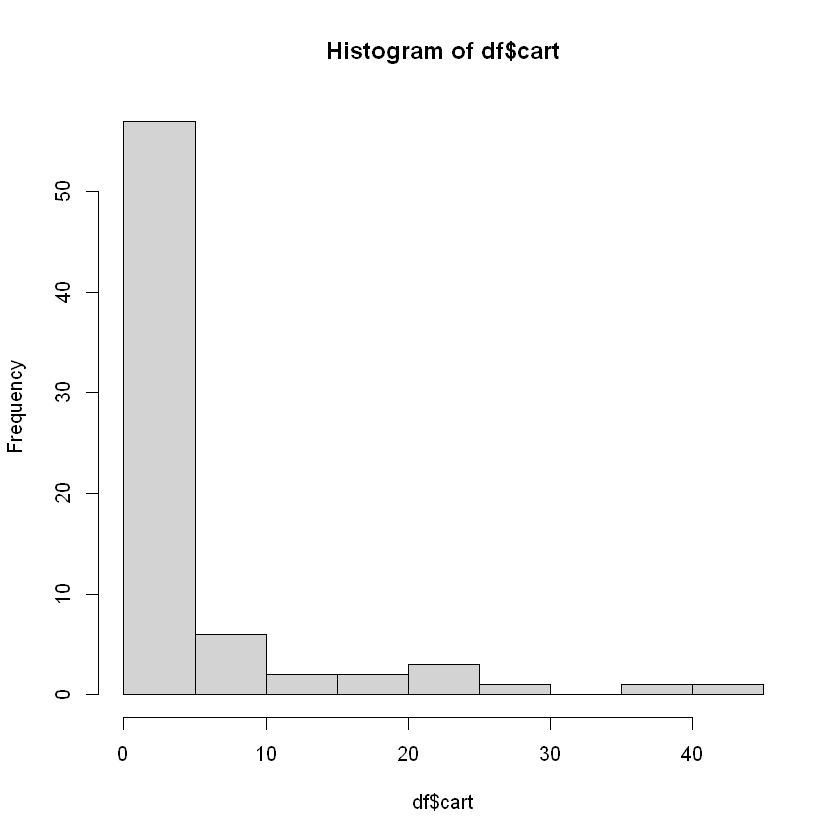

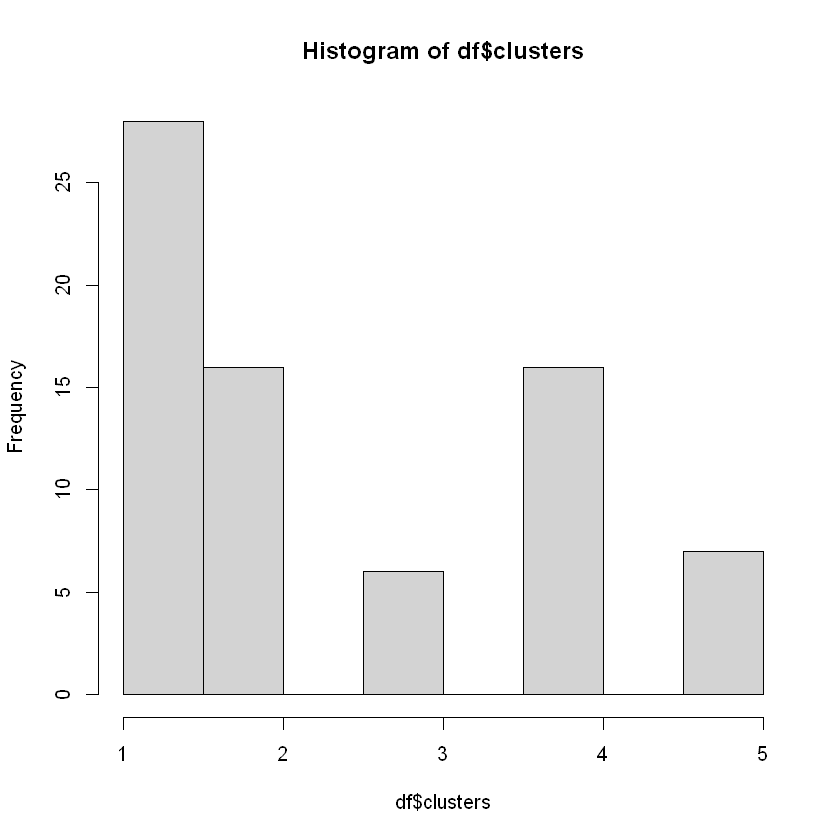

In [9]:
hist(df$cart)
hist(df$clusters)

In [11]:
tree.wa = tree(clusters ~ . - Country  , data = df)
head(df)

Country,bicy,cart,mcyc,pcar,boat,wigc,clusters,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1,1,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,26.4,3.2,9.6,37.0,0.7,0.1,2,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Angola,4.6,1.3,17.8,10.9,0.4,0.3,1,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7
Armenia,8.6,0.4,0.2,39.2,0.3,0.1,3,12457941907,2951776,63.149,103.68022,28470,0.00000,0.00000,12.4
Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0,2,47112941176,9939771,55.680,120.23432,82670,0.00000,0.00000,21.6
Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3,4,274039092455,161356039,36.632,1239.57931,130170,73.91220,1.03276,32.3


In [12]:
summary(tree.wa)


Regression tree:
tree(formula = clusters ~ . - Country, data = df)
Variables actually used in tree construction:
[1] "mori" "mcyc" "upop" "popd" "pcar" "cgdp"
Number of terminal nodes:  10 
Residual mean deviance:  0.7556 = 47.6 / 63 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.00000 -0.44440 -0.07143  0.00000  0.42860  2.55600 

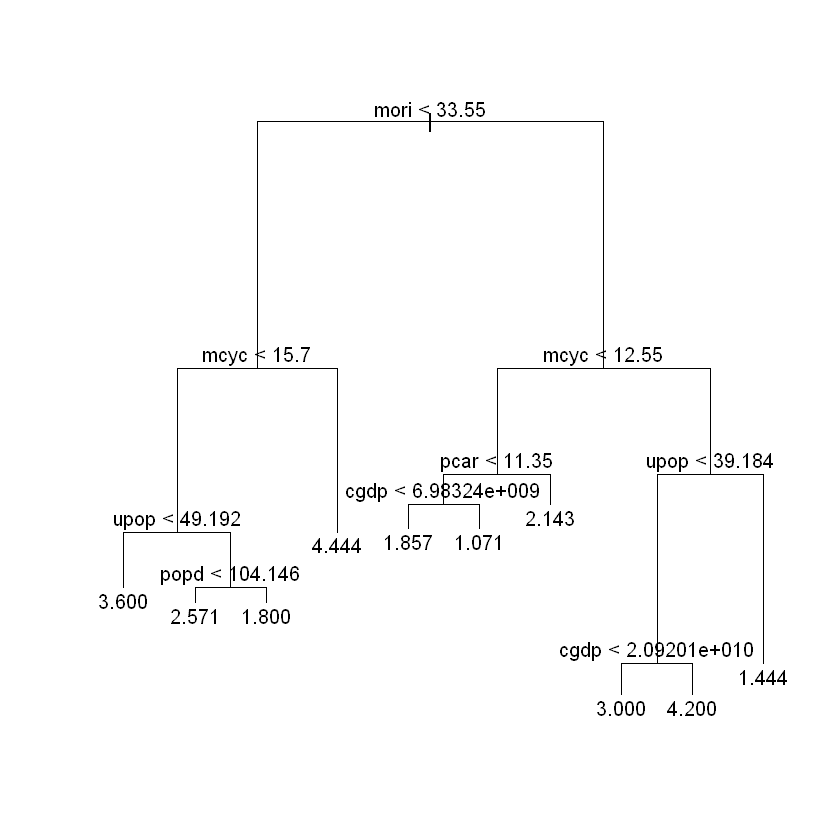

In [13]:
plot(tree.wa)
text(tree.wa, pretty = 0)

In [16]:
tree.wa

node), split, n, deviance, yval
      * denotes terminal node

 1) root 73 147.8000 2.425  
   2) mori < 33.55 26  39.1200 3.269  
     4) mcyc < 15.7 17  15.8800 2.647  
       8) upop < 49.192 5   5.2000 3.600 *
       9) upop > 49.192 12   4.2500 2.250  
        18) popd < 104.146 7   1.7140 2.571 *
        19) popd > 104.146 5   0.8000 1.800 *
     5) mcyc > 15.7 9   4.2220 4.444 *
   3) mori > 33.55 47  79.9100 1.957  
     6) mcyc < 12.55 28  24.9600 1.536  
      12) pcar < 11.35 21  16.6700 1.333  
        24) cgdp < 6.98324e+009 7  12.8600 1.857 *
        25) cgdp > 6.98324e+009 14   0.9286 1.071 *
      13) pcar > 11.35 7   4.8570 2.143 *
     7) mcyc > 12.55 19  42.6300 2.579  
      14) upop < 39.184 10  12.4000 3.600  
        28) cgdp < 2.09201e+010 5   8.0000 3.000 *
        29) cgdp > 2.09201e+010 5   0.8000 4.200 *
      15) upop > 39.184 9   8.2220 1.444 *

In [17]:
set.seed(101)
train = sample(1:nrow(df), 73)
head(train)

[1] 73 57 46 58 61 60

In [20]:
rf.water = randomForest(cart~., data = df, subset = train)
rf.water


Call:
 randomForest(formula = cart ~ ., data = df, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 67.61728
                    % Var explained: 4.38

In [22]:
oob.err = double(13)
test.err = double(13)
for(mtry in 1:13){
  fit = randomForest(cart~., data = df, subset=train, mtry=mtry, ntree = 350)
  oob.err[mtry] = fit$mse[350]
  pred = predict(fit, df[-train,])
  test.err[mtry] = with(df[-train,], mean( (cart-pred)^2 ))
}

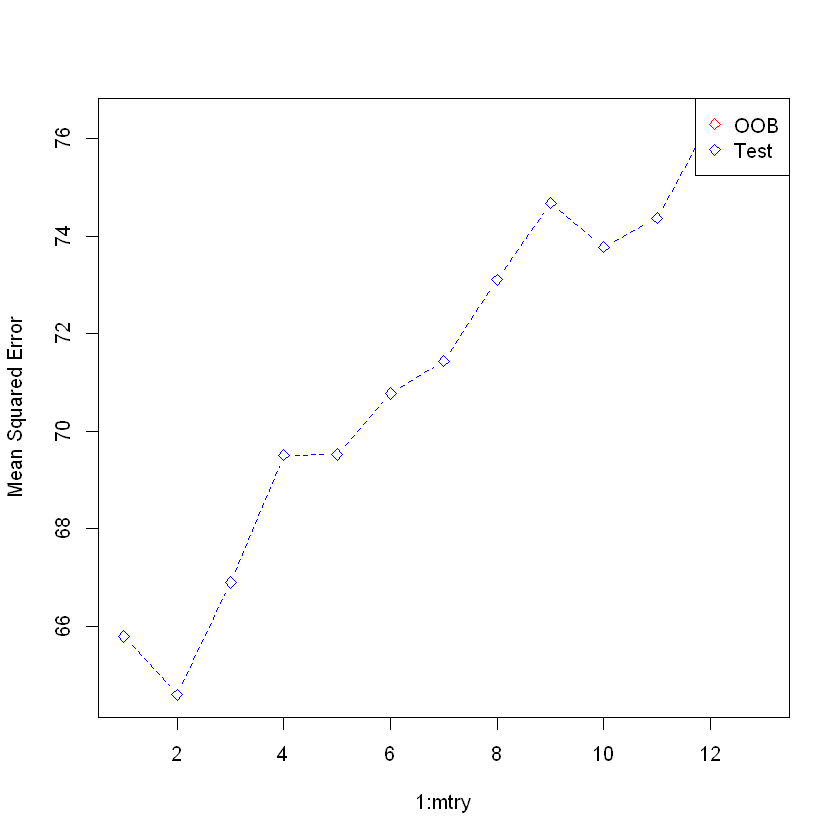

In [23]:
matplot(1:mtry, cbind(test.err, oob.err), pch = 23, col = c("red", "blue"), type = "b", ylab="Mean Squared Error")
legend("topright", legend = c("OOB", "Test"), pch = 23, col = c("red", "blue"))